# House Prices Prediction - Kaggle

Taken from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
train = pd.read_csv('data/train.csv')
print(train.shape)
test = pd.read_csv('data/test.csv')
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Small feature selection: correlation between variables

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
train_model = train.loc[:, (train.dtypes == np.float64)|(train.dtypes == np.int64)].drop(['Id', 'SalePrice'], axis=1)
train_model.
train_model.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [43]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=20).fit_transform(train_model, train['SalePrice'])
X_new.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

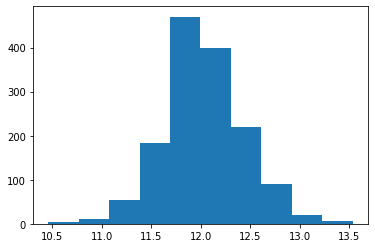

In [4]:
plt.hist(np.log(train.SalePrice))

In [5]:
def preprocess(df):
    df_new = df[['SalePrice', 'LotArea', 'SaleCondition']].copy()
    df_new['log_SalePrice'] = np.log(df_new.SalePrice)
    df_new = pd.get_dummies(df_new, columns = ['SaleCondition'])
    df_new.drop('SalePrice', axis=1, inplace=True)
    return df_new

In [6]:
train_clean = preprocess(train)
train_clean.head()

,LotArea,log_SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,12.247694,0,0,0,0,1,0
1,9600,12.109011,0,0,0,0,1,0
2,11250,12.317167,0,0,0,0,1,0
3,9550,11.849398,1,0,0,0,0,0
4,14260,12.429216,0,0,0,0,1,0


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(regressor, train_clean.drop(['log_SalePrice'], axis=1), train_clean['log_SalePrice'], cv=10, scoring='neg_root_mean_squared_error')
print(scores)
scores.mean(), scores.std()

[-0.40067435 -0.39844569 -0.39090564 -0.44645417 -0.46326237 -0.38857354
 -0.41210142 -0.43975979 -0.39130496 -0.41632235]


(-0.4147804268658331, 0.0250219049782517)

In [8]:
regressor.fit(train_clean.drop(['log_SalePrice'], axis=1), train_clean['log_SalePrice'])

DecisionTreeRegressor(random_state=0)

In [9]:
def preprocess_test(df):
    df_new = df[['LotArea', 'SaleCondition']].copy()
    df_new = pd.get_dummies(df_new, columns = ['SaleCondition'])
    return df_new
test_clean = preprocess_test(test)

In [10]:
pred = regressor.predict(test_clean)

In [11]:
regressor.feature_importances_

array([8.70456755e-01, 9.06696773e-03, 5.20298724e-05, 4.36911271e-03,
       3.66531792e-03, 1.97058063e-02, 9.26840103e-02])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

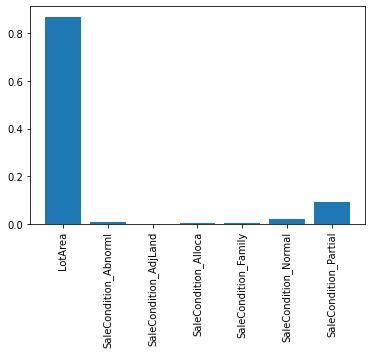

In [12]:
plt.bar(x =train_clean.drop(['log_SalePrice'], axis=1).columns, height=regressor.feature_importances_)
plt.xticks(rotation=90)

# To production

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.columns]

In [28]:
numeric_features = ['LotArea', 'SalePrice']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_features = ['SaleCondition']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [30]:
preprocessor.fit_transform(train)

array([[8.45000e+03, 2.08500e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.60000e+03, 1.81500e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.12500e+04, 2.23500e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [9.04200e+03, 2.66500e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.71700e+03, 1.42125e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.93700e+03, 1.47500e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [31]:
train.shape

(1460, 81)